# TRMM

The dataset used in this notebook is TRMM with daily values (from NASA). The data comes in separate files for each day and thus needs to be concatenated before processing.

Using the filter available on https://disc.gsfc.nasa.gov/SSW/#keywords=TRMM_3B42_Daily%207, the relevant geographical area can be extracted and the daily files downloaded. For the area, paste **5.125,62.375,39.875,97.125** to extract the exact spatial region used in the V. Stolbovas PhD thesis. For the variables, check only **precipitation** and subset the dataset.

If logged in with the earthdata account, the dataset can then be downloaded. Login can be found at https://urs.earthdata.nasa.gov/.

**Resources**

- Official TRMM README
- https://disc.gsfc.nasa.gov/datasets/TRMM_3B42_Daily_7/summary
- https://disc.gsfc.nasa.gov/SSW/#keywords=TRMM_3B42_Daily%207
- https://disc2.gesdisc.eosdis.nasa.gov/opendap/TRMM_L3/TRMM_3B42_Daily.7/
- https://disc.gsfc.nasa.gov/SSW/SSW_URL_List_Downloading_Instructions.html
- https://wiki.earthdata.nasa.gov/display/HDD/Wget+with+URS+Authentication#WgetwithURSAuthentication-Step-by-stepguide

**Citation**

Goddard Earth Sciences Data and Information Services Center(2016), TRMM (TMPA) Precipitation L3 1 day 0.25 degree x 0.25 degree V7, , Goddard Earth Sciences Data and Information Services Center (GES DISC), Accessed [21.08.2017] https://disc.gsfc.nasa.gov/datacollection/TRMM_3B42_Daily_7.html


61.75,4.5,97.75,40.5
- https://giovanni.gsfc.nasa.gov/giovanni/#service=TmAvMp&starttime=1997-12-31T00:00:00Z&endtime=2017-09-29T23:59:59Z&bbox=61.75,4.5,97.75,40.5&data=TRMM_3B42_Daily_7_precipitation&dataKeyword=trmm
- https://disc.sci.gsfc.nasa.gov/datasets?page=1&keywords=TRMM%203B42&start=1920-01-01&end=2016-06-27
- https://disc.sci.gsfc.nasa.gov/data-access

## Dependencies

To get all the dependencies needed for this project, import the corresponding conda environment file:
- **conda-gpu.env** for Tensorflow with GPU support
- **conda.env** for Tensorflow without GPU support

In [39]:
# statistical libraries
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx

# visualization libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly
import plotly.plotly as py
from plotly.graph_objs import Scatter, Layout

# import own library functionality
import paths
from TRMM import TRMM
from Visualization import Visualization

# force autoreload of external modules on save
%load_ext autoreload
%autoreload 2
%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the dataset

In [40]:
# how many years to load data for
# cannot yet use 2017 as the data for december is not complete
# TODO: extend with 2018 as soon as data is available
YEARS = range(1998, 2017)

# pre-monsoon period
MAM = [3, 4, 5]

# monsoon period
JJAS = [6, 7, 8, 9]

# post-monsoon period
OND = [10, 11, 12]

# run the aggregation algorithm over the dataframes?
# the resulting dataframe would be exorbitantly big otherwise
AGGREGATION_RESOLUTION = 1.0

In [41]:
# load data for the pre-monsoon period (MAM)

mam_df = TRMM.load_dataset(
    YEARS,
    MAM,
    aggregation_resolution=AGGREGATION_RESOLUTION,
    timestamp=True,
    invalidate=False,
    version='v2')

> Loading from cache...


In [42]:
# load data for the monsoon period (JJAS)

jjas_df = TRMM.load_dataset(
    YEARS,
    JJAS,
    aggregation_resolution=AGGREGATION_RESOLUTION,
    timestamp=True,
    invalidate=False,
    version='v2')

> Loading from cache...


In [43]:
# load data for the post-monsoon period (OND)

ond_df = TRMM.load_dataset(
    YEARS,
    OND,
    aggregation_resolution=AGGREGATION_RESOLUTION,
    timestamp=True,
    invalidate=False,
    version='v2')

> Loading from cache...


## Exploratory data analysis for the pre-monsoon period (MAM)

In [44]:
mam_df.describe()

,888710400,888796800,888883200,888969600,889056000,889142400,889228800,889315200,889401600,889488000,...,1463875200,1463961600,1464048000,1464134400,1464220800,1464307200,1464393600,1464480000,1464566400,1464652800
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,...,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,3.223138,9.424273,10.618133,6.177516,3.477346,3.114675,3.597823,1.185198,0.803200,1.343221,...,43.453215,64.134873,64.895650,42.137311,36.138471,39.714565,48.610154,41.118794,48.270655,47.973460
std,14.734842,40.191095,35.574806,20.908439,13.502310,13.141355,18.177833,7.055913,4.415457,8.735542,...,145.501715,233.489955,224.845267,160.049080,133.256259,119.372090,127.817747,105.750707,143.261116,121.358394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.074169,0.289187,0.660000,0.410314,0.000000,0.558000,1.582624,1.984345,1.530000,0.737744
75%,0.186000,0.723758,3.390000,2.010000,0.082378,0.151535,0.000000,0.000000,0.000000,0.000000,...,14.895306,20.740462,23.969999,17.603553,11.789265,15.118042,24.360000,24.068124,24.036212,21.930781
max,216.505495,687.058325,576.226891,338.996655,135.009711,249.149998,270.606230,123.724030,75.689996,187.074982,...,1370.429955,2698.559875,3189.839943,2132.939987,1384.469971,1026.719933,1299.929974,1148.999977,1566.423824,1168.049980


In [45]:
mam_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1225 entries, (4.875, 62.375) to (38.875, 96.375)
Columns: 1748 entries, 888710400 to 1464652800
dtypes: float64(1748)
memory usage: 16.3 MB


In [46]:
mam_df.tail()

888710400   888796800   888883200   888969600   \
latitude longitude                                                   
38.875   92.375            0.0         0.0    0.112109         0.0   
         93.375            0.0         0.0    0.054000         0.0   
         94.375            0.0         0.0    0.000000         0.0   
         95.375            0.0         0.0    0.000000         0.0   
         96.375            0.0         0.0    0.000000         0.0   

                    889056000   889142400   889228800   889315200   \
latitude longitude                                                   
38.875   92.375       0.069956    1.605862    2.879527         0.0   
         93.375       0.000000    0.000000    1.554000         0.0   
         94.375       0.000000    0.000000    2.474180         0.0   
         95.375       0.000000    2.037039    7.653275         0.0   
         96.375       0.000000   53.853004    6.972182         0.0   

                    889401600   889488000      ...      1463875200  \
latitude longitude                             ...                   
38.875   92.375            0.0         0.0     ...        0.000000   
         93.375            0.0         0.0     ...        0.000000   
         94.375            0.0         0.0     ...        0.000000   
         95.375            0.0         0.0     ...        0.990779   
         96.375            0.0         0.0     ...        7.566538   

                    1463961600  1464048000  1464134400  1464220800  \
latitude longitude                                                   
38.875   92.375       0.000000    0.000000    0.000000    0.000000   
         93.375       0.000000    0.172560    0.000000    0.000000   
         94.375       0.000000    0.394534    0.000000    0.000000   
         95.375       1.154212    0.452548    1.624288    0.025525   
         96.375       2.897884    0.000000    0.479452    0.083329   

                    1464307200  1464393600  1464480000  1464566400  1464652800  
latitude longitude                                                              
38.875   92.375       0.000000    0.000000    0.415024    4.213769    0.063840  
         93.375       0.000000    0.000000    1.146907    0.515502    7.174216  
         94.375       0.000000    0.000000    0.241421    3.368253    0.133721  
         95.375       2.906207    0.000000    2.244834   17.750197   29.566736  
         96.375       1.097369    8.502419    0.000000   10.505529  106.333057  

[5 rows x 1748 columns]

In [47]:
mam_df[1464134400].unstack()

longitude,62.375,63.375,64.375,65.375,66.375,67.375,68.375,69.375,70.375,71.375,...,87.375,88.375,89.375,90.375,91.375,92.375,93.375,94.375,95.375,96.375
latitude,,,,,,,,,,,,,,,,,,,,,
4.875,28.290000,19.290000,10.800000,15.960000,12.750000,66.269997,17.970000,1.140000,0.000000,3.240000,...,10.530000,3.450000,1.050000,0.000000,0.360000,66.569999,289.709993,511.139986,310.655654,262.534558
5.875,0.840000,0.840000,0.000000,0.000000,0.000000,0.000000,7.230000,6.360000,0.000000,1.950000,...,0.000000,0.930000,9.360000,5.550000,40.289998,213.329992,240.240000,369.599990,79.418748,13.253230
6.875,0.210000,20.610000,12.120000,0.000000,0.420000,0.000000,21.899999,16.379999,26.549999,22.920000,...,0.000000,0.000000,0.450000,0.540000,40.529998,36.089999,392.460002,146.100000,85.409998,79.619998
7.875,64.499998,148.469995,37.019999,0.750000,8.310000,0.000000,7.770000,12.210000,17.460000,193.109999,...,0.000000,0.000000,0.000000,0.000000,21.270000,16.589999,65.879998,26.189999,41.399999,150.419995
8.875,30.450000,140.309999,120.509998,25.919999,137.159994,25.769999,53.429998,100.169997,116.579997,96.899999,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.160000,3.660000,29.819999,122.759997
9.875,3.870000,16.200000,150.479996,48.509999,53.550001,23.280000,25.079999,66.149997,55.859999,23.820000,...,0.000000,0.000000,0.000000,1.500000,0.000000,1.620000,0.300000,0.000000,27.299999,147.839999
10.875,9.029999,45.719999,26.759999,33.689999,32.489999,10.500000,8.610000,45.299999,311.669991,79.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.388323,2.730000,63.719999,233.609998,315.839996
11.875,0.000000,0.960000,25.140000,20.070000,105.449999,35.520001,1.920000,25.440000,179.849998,199.889994,...,0.000000,0.000000,0.000000,0.840000,16.230000,37.453339,301.780928,380.189991,122.909997,214.739996
12.875,0.000000,0.000000,0.450000,5.400000,6.870000,13.739999,0.000000,0.000000,6.630000,1.020000,...,0.000000,0.000000,0.000000,0.000000,0.780000,241.237499,856.542461,536.279995,185.849990,254.369999


In [48]:
mam_df.iloc[0].quantile(0.9)

296.5139922976493

## Exploratory Data Analysis for the Monsoon Period (JJAS)

In [49]:
jjas_df.describe()

,896659200,896745600,896832000,896918400,897004800,897091200,897177600,897264000,897350400,897436800,...,1474416000,1474502400,1474588800,1474675200,1474761600,1474848000,1474934400,1475020800,1475107200,1475193600
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,...,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,155.403018,122.794710,72.280856,54.436829,82.617789,112.977675,72.226575,76.118206,147.078281,108.621554,...,90.249372,78.604470,66.115976,66.608444,56.211387,38.103184,45.329795,49.103173,54.915903,48.994365
std,547.725376,346.012113,214.753288,167.354001,293.556401,449.664652,326.071168,259.247973,414.743473,257.075613,...,162.284492,173.136088,176.472289,154.639690,133.811863,99.547402,116.437867,118.860587,162.787376,133.708960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180000,0.180000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.136231,12.252000,3.783897,1.169900,1.144546,1.446000,2.172502,2.852280,7.675621,10.199156,...,14.369999,5.302252,3.713337,2.580000,1.050000,0.219033,0.450000,0.645384,1.195872,0.309132
75%,53.489998,91.361452,43.949998,29.337808,30.641559,32.399999,20.519999,25.710000,53.729998,70.058358,...,118.070082,75.812900,46.992274,48.312211,36.489393,22.110000,26.107980,28.709999,24.074048,20.684298
max,6029.519073,3693.179932,3091.349918,1842.179977,3976.319839,5230.559967,5594.609863,3201.259811,3798.527359,2779.439896,...,2414.942177,1328.323990,2537.020142,1253.294765,1226.345539,1124.166286,1260.205498,878.879995,1483.949963,1087.830013


In [50]:
jjas_df.tail()

896659200   896745600   896832000   896918400   \
latitude longitude                                                   
38.875   92.375      13.712491    4.183066    0.313365    5.738346   
         93.375       0.000000    1.311134    0.000000    0.383925   
         94.375       0.000000   14.219380    5.572606    1.919351   
         95.375       0.157751   13.883012    1.071141    2.484714   
         96.375       3.432835   20.462006    3.436034    3.538245   

                    897004800   897091200   897177600   897264000   \
latitude longitude                                                   
38.875   92.375       0.000000    0.273633    0.000000    0.000000   
         93.375       0.000000    0.000000    0.000000    0.000000   
         94.375       0.000000    0.000000    0.000000    0.000000   
         95.375      17.051701    2.058238    0.270735    2.331125   
         96.375      90.016343   27.796142    7.383077    3.631317   

                    897350400   897436800      ...      1474416000  \
latitude longitude                             ...                   
38.875   92.375      12.995477    0.000000     ...        0.000000   
         93.375       2.231191    0.000000     ...        0.825277   
         94.375       8.278868    0.000000     ...        0.000000   
         95.375      58.131200   22.888181     ...        1.004599   
         96.375      71.171377   64.198691     ...        0.055475   

                    1474502400  1474588800  1474675200  1474761600  \
latitude longitude                                                   
38.875   92.375       6.427661    4.763599    1.731183   17.513672   
         93.375       2.783735    4.111167    0.486622   48.369060   
         94.375       0.000000    2.781714    0.515309   24.276168   
         95.375       0.000000    9.795900   18.718312   38.644377   
         96.375       1.009225   14.898306   48.312211   12.941234   

                    1474848000  1474934400  1475020800  1475107200  1475193600  
latitude longitude                                                              
38.875   92.375       6.018678    0.000000    0.000000    0.000000    4.578835  
         93.375       5.678137    2.598516    1.300252    2.405451    0.324999  
         94.375       0.324084    0.000000    0.000000    0.161005    0.000000  
         95.375       0.541674    0.000000    0.343671    0.043609    0.816919  
         96.375       0.000000    0.000000    0.053252    0.133914    2.006085  

[5 rows x 2318 columns]

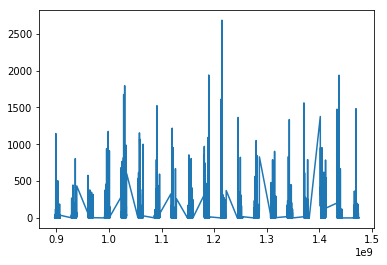

In [51]:
jjas_df.iloc[0].plot()

In [52]:
jjas_df.iloc[0].quantile(0.9)

218.52899128198658

## Exploratory Data Analysis for the Post-Monsoon Period (OND)

In [53]:
ond_df.describe()

,907200000,907286400,907372800,907459200,907545600,907632000,907718400,907804800,907891200,907977600,...,1482364800,1482451200,1482537600,1482624000,1482710400,1482796800,1482883200,1482969600,1483056000,1483142400
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,...,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,70.406294,89.131117,77.464240,46.405761,53.280797,58.369217,79.181370,79.623801,95.012745,114.278701,...,21.476738,27.013271,16.080470,14.616775,9.690587,15.725368,10.005247,17.541874,21.982428,18.403330
std,146.709671,191.476882,169.409103,110.584116,188.104594,156.270980,204.510602,148.193339,169.765686,216.474421,...,119.677443,124.203828,70.952251,70.173086,47.109270,77.918031,53.795597,92.545517,120.038328,110.300853
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090000,0.101908,0.121899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.332750,9.148469,7.690169,2.700000,0.906665,1.199364,2.908046,4.788636,9.037885,7.440000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.950718,81.442481,63.201765,36.630000,20.339999,29.189999,65.280001,101.009997,117.774277,133.799997,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324676,0.000000,0.000000,0.000000
max,1539.749954,1560.149963,1782.119900,1337.699991,2904.659927,1838.699959,2701.949944,1645.979969,1219.229980,1429.620003,...,1492.889965,1188.089977,689.279977,870.089994,1061.822868,1143.659969,835.199986,1051.049946,1457.309948,1443.779987


In [54]:
ond_df.tail()

907200000   907286400   907372800   907459200   \
latitude longitude                                                   
38.875   92.375       1.266000         0.0         0.0       0.000   
         93.375       0.762000         0.0         0.0       0.000   
         94.375       0.048000         0.0         0.0       0.390   
         95.375       0.186000         0.0         0.0       0.756   
         96.375       0.994616         0.0         0.0       0.000   

                    907545600   907632000   907718400   907804800   \
latitude longitude                                                   
38.875   92.375            0.0       0.000    0.312000         0.0   
         93.375            0.0       0.000    2.748000         0.0   
         94.375            0.0       0.000   12.540000         0.0   
         95.375            0.0       0.546   25.404000         0.0   
         96.375            0.0       0.000    8.683698         0.0   

                    907891200   907977600      ...      1482364800  \
latitude longitude                             ...                   
38.875   92.375            0.0    7.248000     ...             0.0   
         93.375            0.0    9.378000     ...             0.0   
         94.375            0.0   34.896000     ...             0.0   
         95.375            0.0   15.750001     ...             0.0   
         96.375            0.0    2.716996     ...             0.0   

                    1482451200  1482537600  1482624000  1482710400  \
latitude longitude                                                   
38.875   92.375       2.046374        0.00         0.0         0.0   
         93.375       5.130103        0.00         0.0         0.0   
         94.375       0.000000        0.00         0.0         0.0   
         95.375       0.000000        0.00         0.0         0.0   
         96.375       9.171978        0.63         0.0         0.0   

                    1482796800  1482883200  1482969600  1483056000  1483142400  
latitude longitude                                                              
38.875   92.375            0.0    5.412941         0.0         0.0         0.0  
         93.375            0.0    0.000000         0.0         0.0         0.0  
         94.375            0.0    5.260556         0.0         0.0         0.0  
         95.375            0.0    0.000000         0.0         0.0         0.0  
         96.375            0.0    0.000000         0.0         0.0         0.0  

[5 rows x 1748 columns]

In [55]:
ond_df.unstack(-1)

907200000                                                   \
longitude      62.375      63.375      64.375      65.375      66.375   
latitude                                                                
4.875      155.999994  284.129986  182.819995  185.609996  181.439997   
5.875      104.429997  143.429998  113.759996   94.049999  153.899992   
6.875        6.420000   46.379998   72.929997   55.649998   72.269998   
7.875        0.030000    0.000000    5.580000   40.169999   28.319999   
8.875        0.030000    0.000000    0.000000    0.090000    0.000000   
9.875       16.289999    0.420000    0.600000    0.300000    0.000000   
10.875       1.860000   10.860000   11.280000    0.360000    0.000000   
11.875       0.000000    3.930000    6.540000    0.000000    0.120000   
12.875       2.070000    1.080000    3.900000    0.090000    2.310000   
13.875       4.590000    7.050000   10.290000    4.020000    0.780000   
14.875       0.690000    1.410000    2.460000    0.510000    0.450000   
15.875       9.600000    1.230000    0.780000   10.860000   16.649999   
16.875      48.479999   13.560000    8.910000   30.630000    6.750000   
17.875      27.330000    0.000000    0.300000    0.090000    0.330000   
18.875       0.510000    0.150000    0.930000    1.380000    4.440000   
19.875       0.330000    3.270000    0.540000    2.220000   14.490000   
20.875       0.570000    5.430000   20.069999    8.250000   24.389999   
21.875       0.000000    0.900000    3.660000    2.700000    1.800000   
22.875       0.000000    0.000000    0.000000    0.000000    0.000000   
23.875       0.000000    0.000000    0.150000    0.000000    0.000000   
24.875       0.000000    0.000000    0.000000    0.000000    0.000000   
25.875       0.000000    0.000000    0.000000    0.000000    2.611242   
26.875       0.000000    0.000000    0.000000    0.000000   24.248806   
27.875       0.000000    0.000000    0.950105    0.000000    0.000000   
28.875       0.036000    2.394623    0.245988    0.000000    0.000000   
29.875       0.000000    0.000000    0.000000    0.000000    0.000000   
30.875       0.000000    0.000000    0.000000    0.000000    0.064049   
31.875       0.000000    0.000000    0.000000    0.000000    0.000000   
32.875       0.000000    0.000000    0.000000    0.000000    0.022904   
33.875       0.316031    0.000000    0.000000    3.485083    0.118864   
34.875       0.273245    0.000000    0.715552    0.019086    0.000000   
35.875       0.000000    0.000000    0.000000    0.461318    0.185153   
36.875       0.000000    0.000000    0.000000    0.000000    0.000000   
37.875       0.000000    0.000000    0.000000    0.000000    0.032942   
38.875       0.000000    0.000000    0.000000    0.000000    0.293386   

                                                                       \
longitude      67.375      68.375      69.375      70.375      71.375   
latitude                                                                
4.875       43.439999   27.329999   10.020000    9.570000   18.449999   
5.875      133.049995  118.139997   69.329997   37.379999   15.630000   
6.875       72.239999   54.960000   54.989999   51.809999   25.739999   
7.875        7.200000   10.080000   18.330000   20.009999   20.400000   
8.875        1.020000    4.830000   19.170000   34.169999   38.819998   
9.875        2.400000    1.260000    1.680000    4.860000    3.060000   
10.875       0.000000    0.060000    3.060000    1.260000    0.450000   
11.875       0.150000    0.180000    0.570000    0.900000    7.800000   
12.875       3.180000    5.130000    0.150000    1.260000    6.030000   
13.875       1.440000   11.220000    2.580000   13.050000   34.050000   
14.875       0.420000    0.840000    0.630000    5.880000   62.579999   
15.875       1.890000    0.660000    0.150000    0.420000   39.329998   
16.875       5.340000   17.490000    4.650000    4.650000   70.859995   
17.875       9.360000   12.239999    6.000000    7.770000   23.58000

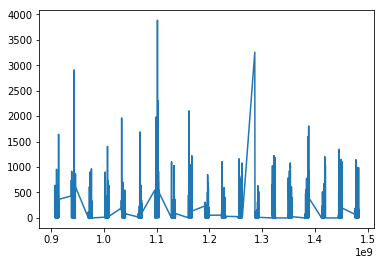

In [56]:
ond_df.iloc[0].plot()

In [57]:
ond_df.iloc[0].quantile(0.9)

454.7459898471832

## Extract Extreme Events for the Pre-Monsoon Phase (MAM)

Events are regarded as extreme events if they fall above the 90% quantile of the entire time-series.

In [58]:
# extract extreme events from the dataset
# results in a matrix of boolean values for Extreme/Non-Extreme

mam_extreme_events = TRMM.extract_extreme_events(mam_df, quantile=0.90)
mam_extreme_events.head(10)

888710400   888796800   888883200   888969600   \
latitude longitude                                                   
4.875    62.375          False       False       False       False   
         63.375          False       False       False       False   
         64.375          False       False       False       False   
         65.375          False       False       False       False   
         66.375          False       False       False       False   
         67.375          False       False       False       False   
         68.375          False       False       False       False   
         69.375          False       False       False       False   
         70.375          False       False       False       False   
         71.375          False       False       False       False   

                    889056000   889142400   889228800   889315200   \
latitude longitude                                                   
4.875    62.375          False       False       False       False   
         63.375          False       False       False       False   
         64.375          False       False       False       False   
         65.375          False       False       False       False   
         66.375          False       False       False       False   
         67.375          False       False       False       False   
         68.375          False       False       False       False   
         69.375          False       False       False       False   
         70.375          False       False       False       False   
         71.375          False       False       False       False   

                    889401600   889488000      ...      1463875200  \
latitude longitude                             ...                   
4.875    62.375          False       False     ...           False   
         63.375          False       False     ...           False   
         64.375          False       False     ...           False   
         65.375          False       False     ...           False   
         66.375          False       False     ...           False   
         67.375          False       False     ...           False   
         68.375          False       False     ...           False   
         69.375          False       False     ...           False   
         70.375          False       False     ...           False   
         71.375          False       False     ...           False   

                    1463961600  1464048000  1464134400  1464220800  \
latitude longitude                                                   
4.875    62.375          False       False       False       False   
         63.375          False       False       False       False   
         64.375          False       False       False       False   
         65.375          False       False       False       False   
         66.375          False       False       False       False   
         67.375          False       False       False       False   
         68.375          False       False       False       False   
         69.375          False       False       False       False   
         70.375          False       False       False       False   
         71.375          False       False       False       False   

                    1464307200  1464393600  1464480000  1464566400  1464652800  
latitude longitude                                                              
4.875    62.375          False       False       False       False       False  
         63.375          False       False       False       False       False  
         64.375          False       False       False       False       False  
         65.375          False       False       False       False       False  
         66.375          False       False       False       False       False  
         67.375          False       False       False       False       False  
        

In [59]:
# print only the events that are extreme for the very first row

mam_extreme_events.iloc[0][mam_extreme_events.iloc[0]].head()

890265600    True
891043200    True
892598400    True
892684800    True
894326400    True
Name: (4.875, 62.375), dtype: bool

## Calculate Event Synchronization for the Pre-Monsoon Phase (MAM)

For each pair of grid cells, the level of synchronization in extreme events should be calculated.

In [60]:
# calculate the synchronization matrix

mam_sync_matrix, mam_count_matrix, mam_runtime = TRMM.calculate_sync_matrix(mam_extreme_events, 'MAM')

> Loading from cache...


In [61]:
mam_sync_matrix[0:10]

latitude              4.875                                           \
longitude             62.375    63.375    64.375    65.375    66.375   
latitude longitude                                                     
4.875    62.375     1.000000  0.774566  0.647399  0.572254  0.526012   
         63.375     0.774566  1.000000  0.763006  0.641618  0.583815   
         64.375     0.647399  0.763006  1.000000  0.768786  0.670520   
         65.375     0.572254  0.641618  0.768786  1.000000  0.745665   
         66.375     0.526012  0.583815  0.670520  0.745665  1.000000   
         67.375     0.485549  0.508671  0.589595  0.641618  0.728324   
         68.375     0.433526  0.445087  0.479769  0.578035  0.647399   
         69.375     0.387283  0.445087  0.462428  0.508671  0.601156   
         70.375     0.312139  0.358382  0.364162  0.456647  0.485549   
         71.375     0.335260  0.375723  0.381503  0.433526  0.468208   

latitude                                                              \
longitude             67.375    68.375    69.375    70.375    71.375   
latitude longitude                                                     
4.875    62.375     0.485549  0.433526  0.387283  0.312139  0.335260   
         63.375     0.508671  0.445087  0.445087  0.358382  0.375723   
         64.375     0.589595  0.479769  0.462428  0.364162  0.381503   
         65.375     0.641618  0.578035  0.508671  0.456647  0.433526   
         66.375     0.728324  0.647399  0.601156  0.485549  0.468208   
         67.375     1.000000  0.722543  0.635838  0.572254  0.514451   
         68.375     0.722543  1.000000  0.739884  0.647399  0.601156   
         69.375     0.635838  0.739884  1.000000  0.734104  0.676301   
         70.375     0.572254  0.647399  0.734104  1.000000  0.797688   
         71.375     0.514451  0.601156  0.676301  0.797688  1.000000   

latitude              ...       38.875                                \
longitude             ...       87.375    88.375    89.375    90.375   
latitude longitude    ...                                              
4.875    62.375       ...     0.213873  0.236994  0.219653  0.213873   
         63.375       ...     0.225434  0.271676  0.248555  0.260116   
         64.375       ...     0.231214  0.248555  0.265896  0.248555   
         65.375       ...     0.248555  0.283237  0.265896  0.265896   
         66.375       ...     0.231214  0.277457  0.254335  0.225434   
         67.375       ...     0.225434  0.271676  0.196532  0.231214   
         68.375       ...     0.231214  0.260116  0.173410  0.202312   
         69.375       ...     0.219653  0.271676  0.190751  0.219653   
         70.375       ...     0.208092  0.231214  0.167630  0.196532   
         71.375       ...     0.184971  0.213873  0.144509  0.190751   

latitude                                                                        
longitude             91.375    92.375    93.375    94.375    95.375    96.375  
latitude longitude                                                              
4.875    62.375     0.236994  0.213873  0.179191  0.167630  0.208092  0.236994  
         63.375     0.277457  0.208092  0.202312  0.184971  0.231214  0.260116  
         64.375     0.242775  0.219653  0.213873  0.254335  0.225434  0.265896  
         65.375     0.260116  0.219653  0.202312  0.213873  0.190751  0.248555  
         66.375     0.231214  0.213873  0.179191  0.236994  0.236994  0.260116  
         67.375     0.242775  0.190751  0.184971  0.225434  0.225434  0.236994  
         68.375     0.236994  0.190751  0.179191  0.213873  0.248555  0.242775  
         69.375     0.219653  0.190751  0.179191  0.184971  0.225434  0.254335  
         70.375     0.184971  0.161850  0.219653  0.213873  0.213873  0.248555  
         71.375     0.196532  0.173410  0.173410  0.213873  0.190751  0.219653  

[10 rows x 1225 columns]

In [62]:
mam_count_matrix[0:10]

latitude           4.875                                                    \
longitude          62.375 63.375 64.375 65.375 66.375 67.375 68.375 69.375   
latitude longitude                                                           
4.875    62.375     173.0  134.0  112.0   99.0   91.0   84.0   75.0   67.0   
         63.375     134.0  173.0  132.0  111.0  101.0   88.0   77.0   77.0   
         64.375     112.0  132.0  173.0  133.0  116.0  102.0   83.0   80.0   
         65.375      99.0  111.0  133.0  173.0  129.0  111.0  100.0   88.0   
         66.375      91.0  101.0  116.0  129.0  173.0  126.0  112.0  104.0   
         67.375      84.0   88.0  102.0  111.0  126.0  173.0  125.0  110.0   
         68.375      75.0   77.0   83.0  100.0  112.0  125.0  173.0  128.0   
         69.375      67.0   77.0   80.0   88.0  104.0  110.0  128.0  173.0   
         70.375      54.0   62.0   63.0   79.0   84.0   99.0  112.0  127.0   
         71.375      58.0   65.0   66.0   75.0   81.0   89.0  104.0  117.0   

latitude                          ...   38.875                              \
longitude          70.375 71.375  ...   87.375 88.375 89.375 90.375 91.375   
latitude longitude                ...                                        
4.875    62.375      54.0   58.0  ...     37.0   41.0   38.0   37.0   41.0   
         63.375      62.0   65.0  ...     39.0   47.0   43.0   45.0   48.0   
         64.375      63.0   66.0  ...     40.0   43.0   46.0   43.0   42.0   
         65.375      79.0   75.0  ...     43.0   49.0   46.0   46.0   45.0   
         66.375      84.0   81.0  ...     40.0   48.0   44.0   39.0   40.0   
         67.375      99.0   89.0  ...     39.0   47.0   34.0   40.0   42.0   
         68.375     112.0  104.0  ...     40.0   45.0   30.0   35.0   41.0   
         69.375     127.0  117.0  ...     38.0   47.0   33.0   38.0   38.0   
         70.375     173.0  138.0  ...     36.0   40.0   29.0   34.0   32.0   
         71.375     138.0  173.0  ...     32.0   37.0   25.0   33.0   34.0   

latitude                                               
longitude          92.375 93.375 94.375 95.375 96.375  
latitude longitude                                     
4.875    62.375      37.0   31.0   29.0   36.0   41.0  
         63.375      36.0   35.0   32.0   40.0   45.0  
         64.375      38.0   37.0   44.0   39.0   46.0  
         65.375      38.0   35.0   37.0   33.0   43.0  
         66.375      37.0   31.0   41.0   41.0   45.0  
         67.375      33.0   32.0   39.0   39.0   41.0  
         68.375      33.0   31.0   37.0   43.0   42.0  
         69.375      33.0   31.0   32.0   39.0   44.0  
         70.375      28.0   38.0   37.0   37.0   43.0  
         71.375      30.0   30.0   37.0   33.0   38.0  

[10 rows x 1225 columns]

In [63]:
mam_sync_matrix.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1225 entries, (4.875, 62.375) to (38.875, 96.375)
Columns: 1225 entries, (4.875, 62.375) to (38.875, 96.375)
dtypes: float32(1225)
memory usage: 5.8 MB


In [64]:
mam_count_matrix.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1225 entries, (4.875, 62.375) to (38.875, 96.375)
Columns: 1225 entries, (4.875, 62.375) to (38.875, 96.375)
dtypes: float64(1225)
memory usage: 11.5 MB


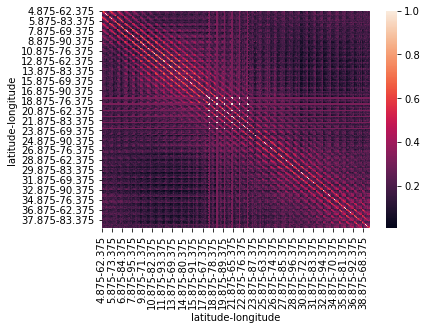

In [65]:
sns.heatmap(mam_sync_matrix)

## Create Graph Representation for the Climate Network (MAM)

Generate a graph representation from the above count matrix. Only use data above the 95% quantile (as specified).

In [ ]:
mam_count_matrix.quantile(0.95).quantile(0.95)

In [66]:
mam_graph = TRMM.generate_graph(mam_count_matrix, quantile=0.95)
mam_graph.nodes[0]

{'coordinates': (4.875, 62.375)}

In [67]:
mam_graph.edges

EdgeView([(0, 0), (0, 1), (0, 35), (0, 460), (0, 490), (0, 491), (0, 492), (0, 493), (0, 494), (0, 495), (0, 496), (0, 497), (0, 525), (0, 526), (0, 527), (0, 528), (0, 529), (0, 530), (0, 531), (0, 560), (0, 561), (0, 562), (0, 563), (0, 564), (0, 565), (0, 595), (0, 596), (0, 597), (0, 598), (0, 599), (0, 600), (0, 631), (0, 632), (0, 633), (0, 634), (0, 635), (0, 666), (0, 667), (0, 668), (0, 673), (0, 674), (0, 707), (0, 708), (0, 742), (0, 743), (0, 744), (1, 1), (1, 2), (1, 460), (1, 490), (1, 491), (1, 492), (1, 493), (1, 494), (1, 495), (1, 496), (1, 497), (1, 525), (1, 526), (1, 527), (1, 528), (1, 529), (1, 530), (1, 531), (1, 560), (1, 561), (1, 562), (1, 563), (1, 564), (1, 565), (1, 595), (1, 596), (1, 597), (1, 598), (1, 599), (1, 600), (1, 631), (1, 632), (1, 633), (1, 634), (1, 635), (1, 666), (1, 667), (1, 668), (1, 673), (1, 674), (1, 707), (1, 708), (1, 742), (1, 743), (1, 744), (2, 2), (2, 3), (2, 460), (2, 490), (2, 491), (2, 492), (2, 493), (2, 494), (2, 495), (2,

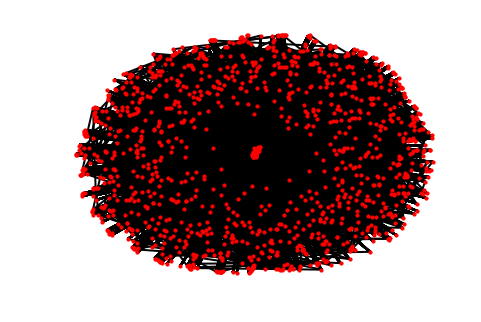

In [68]:
nx.draw(mam_graph, node_size=10, width=2)

In [70]:
mam_cent_degree, mam_cent_between, mam_pagerank = TRMM.calculate_centrality(mam_graph)

### Degree

In [ ]:
mam_cent_degree.head()

### Betweenness

In [72]:
mam_cent_between.head(5)

,lat,lon,val,text,val_std
0,4.875,62.375,3.036473e-08,"(4.875, 62.375)=0.0000",0.000001
1,4.875,63.375,3.036473e-08,"(4.875, 63.375)=0.0000",0.000001
2,4.875,64.375,3.036473e-08,"(4.875, 64.375)=0.0000",0.000001
3,4.875,65.375,3.036473e-08,"(4.875, 65.375)=0.0000",0.000001
4,4.875,66.375,9.109419e-08,"(4.875, 66.375)=0.0000",0.000004


### PageRank

In [73]:
mam_pagerank.head(5)

,lat,lon,val,text,val_std
0,4.875,62.375,0.000459,"(4.875, 62.375)=0.0005",0.001692
1,4.875,63.375,0.000459,"(4.875, 63.375)=0.0005",0.001692
2,4.875,64.375,0.000459,"(4.875, 64.375)=0.0005",0.001692
3,4.875,65.375,0.000459,"(4.875, 65.375)=0.0005",0.001690
4,4.875,66.375,0.000467,"(4.875, 66.375)=0.0005",0.002530


## Visualize the Climate Network

### Pre-Monsoon (MAM)

In [56]:
# calculate plotly nodes for the three measures calculated above
mam_nodes_degree = Visualization.create_plot_nodes(mam_cent_degree, 'rgb(255, 0, 0)', 'Centrality')
mam_nodes_between = Visualization.create_plot_nodes(mam_cent_between, 'rgb(0, 255, 0)', 'Betweenness')
mam_nodes_pagerank = Visualization.create_plot_nodes(mam_pagerank, 'rgb(0, 0, 255)', 'PageRank')

# calculate plotly edges from the real edges of the graph
mam_edges = Visualization.create_plot_edges(mam_graph)

# customize the layout of the graph
mam_layout = Visualization.create_plot_layout('Centrality Measures (Degree, Betweenness, PageRank) in MAM')

# display the plot
fig = dict( data=[mam_nodes_degree, mam_nodes_between, mam_nodes_pagerank] + mam_edges, layout=mam_layout )
url = plotly.offline.iplot(fig)

(<matplotlib.figure.Figure at 0x2d1f54764e0>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2d18bc10630>)

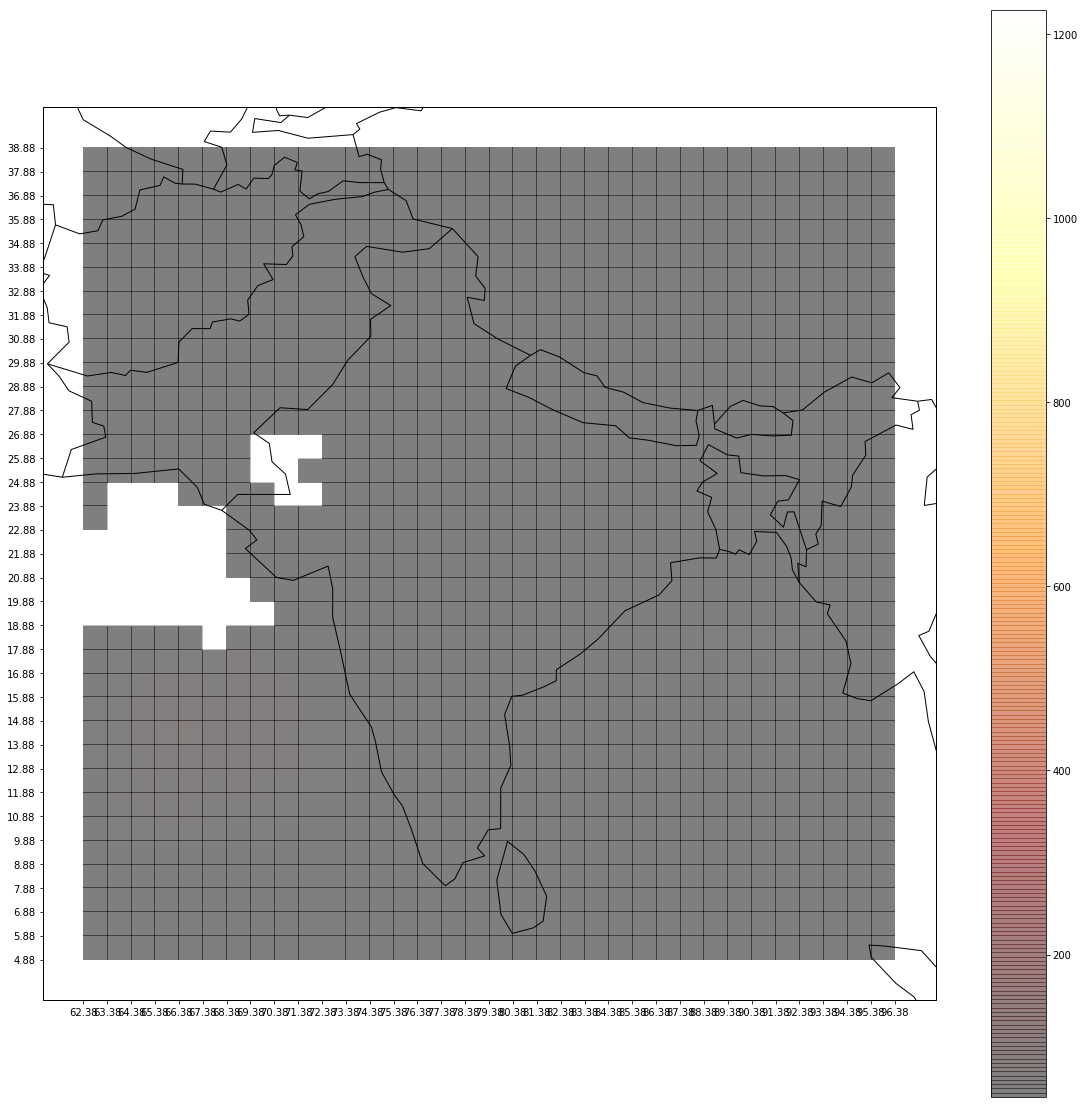

In [78]:
Visualization.create_cartopy_vis(mam_cent_degree, 'MAM_centrality_1.0.png')

(<matplotlib.figure.Figure at 0x2d198ccc160>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2d198cd0438>)

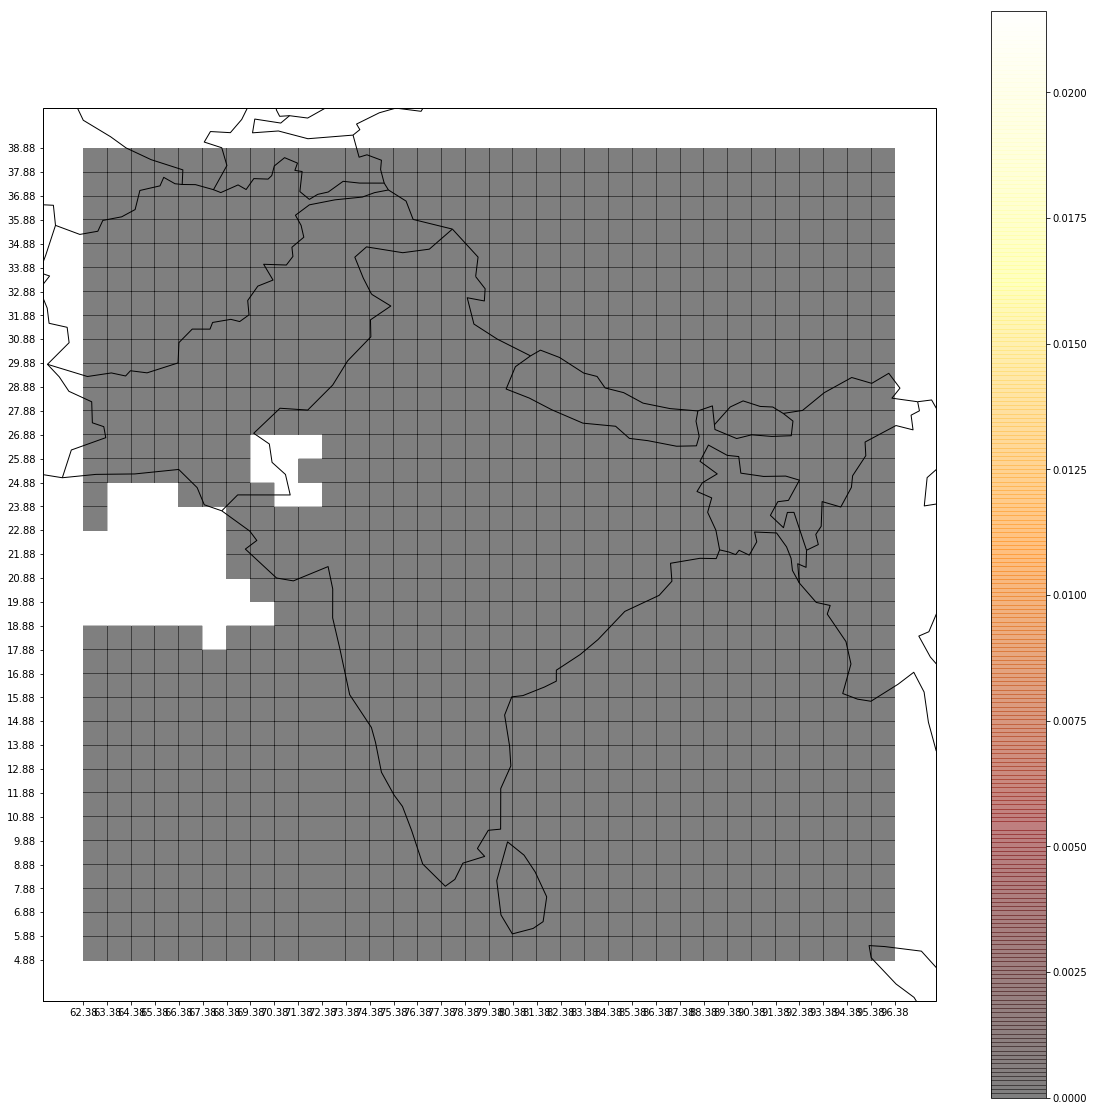

In [75]:
Visualization.create_cartopy_vis(mam_cent_between, 'MAM_betweenness_1.0.png')

(<matplotlib.figure.Figure at 0x2d198dabb00>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2d198d41a20>)

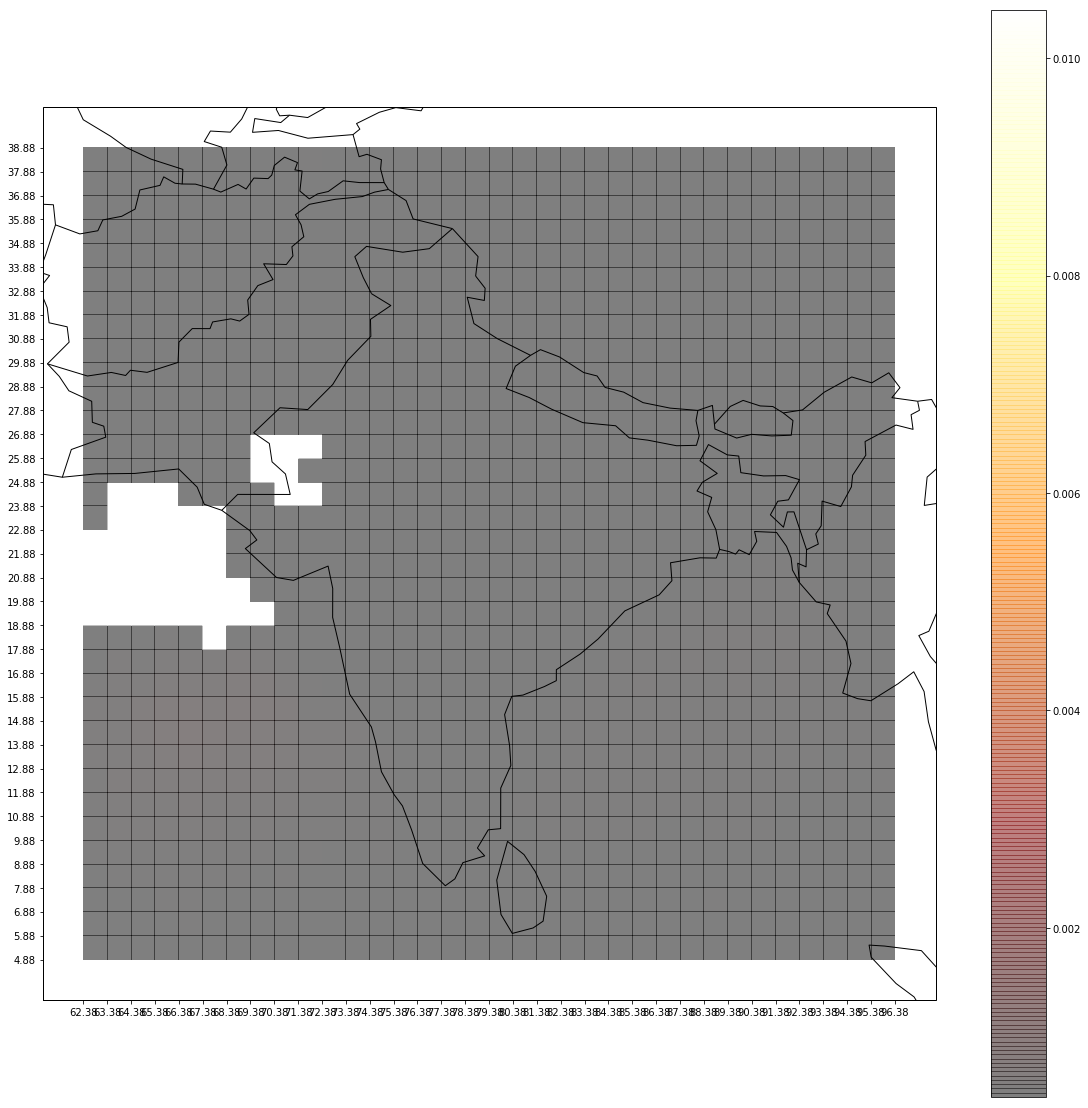

In [76]:
Visualization.create_cartopy_vis(mam_pagerank, 'MAM_pagerank_1.0.png')

### Monsoon (JJAS)

In [79]:
# calculate extreme events and the sync and count matrices
jjas_extreme_events = TRMM.extract_extreme_events(jjas_df, quantile=0.9)
jjas_sync_matrix, jjas_count_matrix, jjas_runtime = TRMM.calculate_sync_matrix(jjas_extreme_events, 'JJAS')

# create a climate network graph and calculate centrality measures
jjas_graph = TRMM.generate_graph(jjas_count_matrix, quantile=0.95)
jjas_cent_degree, jjas_cent_between, jjas_pagerank = TRMM.calculate_centrality(jjas_graph)
                                                                                                                                                     
# create a plot from the above generated data
jjas_nodes_degree = Visualization.create_plot_nodes(jjas_cent_degree, 'rgb(255, 0, 0)', 'Degree')
jjas_nodes_between = Visualization.create_plot_nodes(jjas_cent_between, 'rgb(0, 255, 0)', 'Betweenness')
jjas_nodes_pagerank = Visualization.create_plot_nodes(jjas_pagerank, 'rgb(0, 0, 255)', 'PageRank')
jjas_edges = Visualization.create_plot_edges(jjas_graph)
jjas_layout = Visualization.create_plot_layout('Centrality Measures (Degree, Betweenness, PageRank) in JJAS')

# display the plot
# fig = dict( data=[jjas_nodes_degree, jjas_nodes_between, jjas_nodes_pagerank] + jjas_edges, layout=jjas_layout )
# url = plotly.offline.iplot(fig)

> Loading from cache...


(<matplotlib.figure.Figure at 0x2d1f9ced9e8>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2d1889ae0f0>)

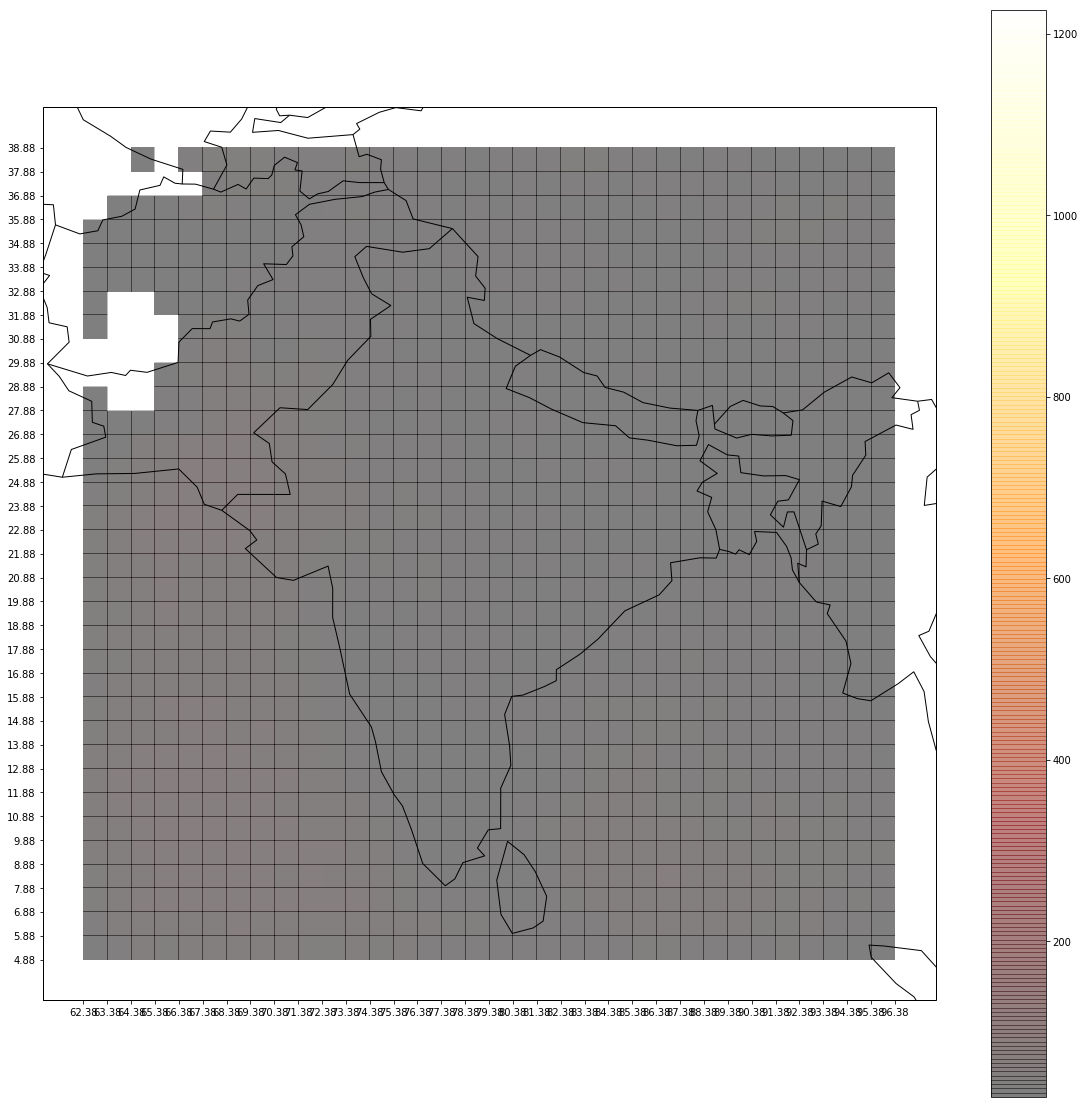

In [80]:
Visualization.create_cartopy_vis(jjas_cent_degree, 'JJAS_centrality_1.0.png')

(<matplotlib.figure.Figure at 0x2d18f49b5f8>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2d18f415fd0>)

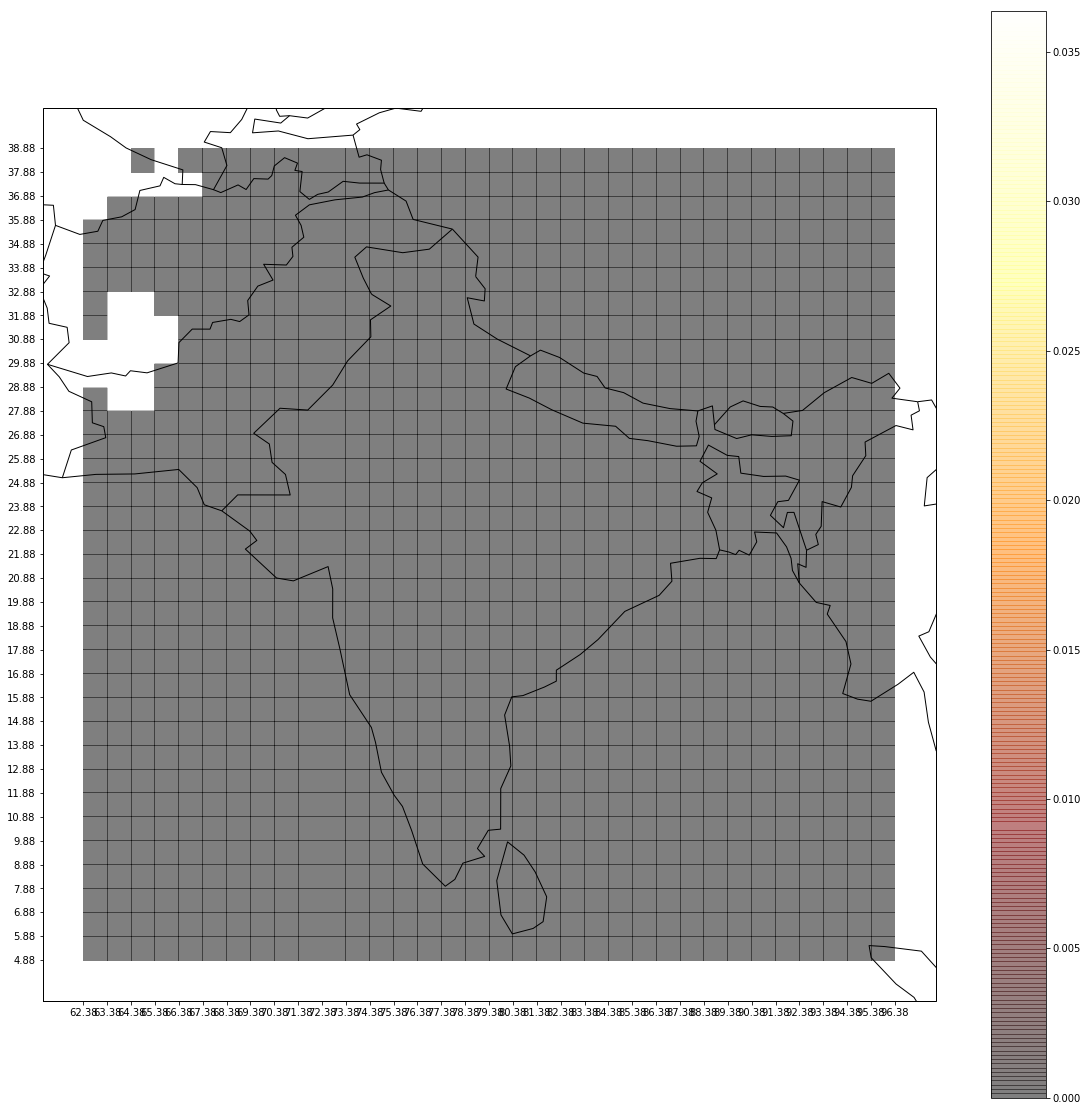

In [81]:
Visualization.create_cartopy_vis(jjas_cent_between, 'JJAS_betweenness_1.0.png')

(<matplotlib.figure.Figure at 0x2d18f6037b8>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2d18f50cc88>)

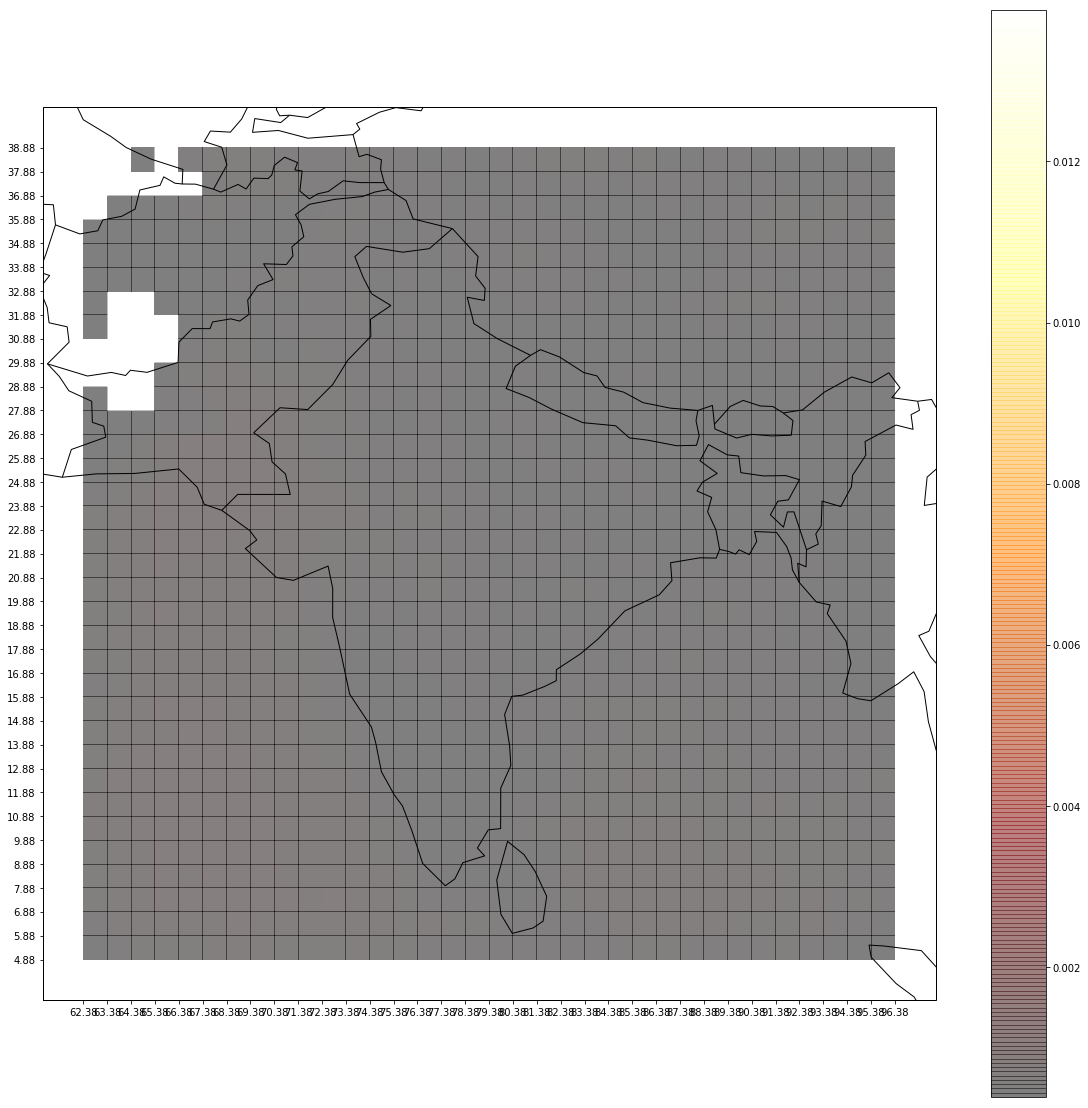

In [82]:
Visualization.create_cartopy_vis(jjas_pagerank, 'JJAS_pagerank_1.0.png')

### Post-Monsoon (OND)

In [83]:
# calculate extreme events and the sync and count matrices
ond_extreme_events = TRMM.extract_extreme_events(ond_df, quantile=0.9)
ond_sync_matrix, ond_count_matrix, ond_runtime = TRMM.calculate_sync_matrix(ond_extreme_events, 'OND')

# create a climate network graph and calculate centrality measures
ond_graph = TRMM.generate_graph(ond_count_matrix, quantile=0.95)
ond_cent_degree, ond_cent_between, ond_pagerank = TRMM.calculate_centrality(ond_graph)
                                                                                                                                                     
# create a plot from the above generated data
ond_nodes_degree = Visualization.create_plot_nodes(ond_cent_degree, 'rgb(255, 0, 0)', 'Degree')
ond_nodes_between = Visualization.create_plot_nodes(ond_cent_between, 'rgb(0, 255, 0)', 'Betweenness')
ond_nodes_pagerank = Visualization.create_plot_nodes(ond_pagerank, 'rgb(0, 0, 255)', 'PageRank')
ond_edges = Visualization.create_plot_edges(ond_graph)
ond_layout = Visualization.create_plot_layout('Centrality Measures (Degree, Betweenness, PageRank) in OND')

# display the plot
# fig = dict( data=[ond_nodes_degree, ond_nodes_between, ond_nodes_pagerank] + ond_edges, layout=ond_layout )
# url = plotly.offline.iplot(fig)

> Loading from cache...


(<matplotlib.figure.Figure at 0x2d1985ee780>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2d18f597048>)

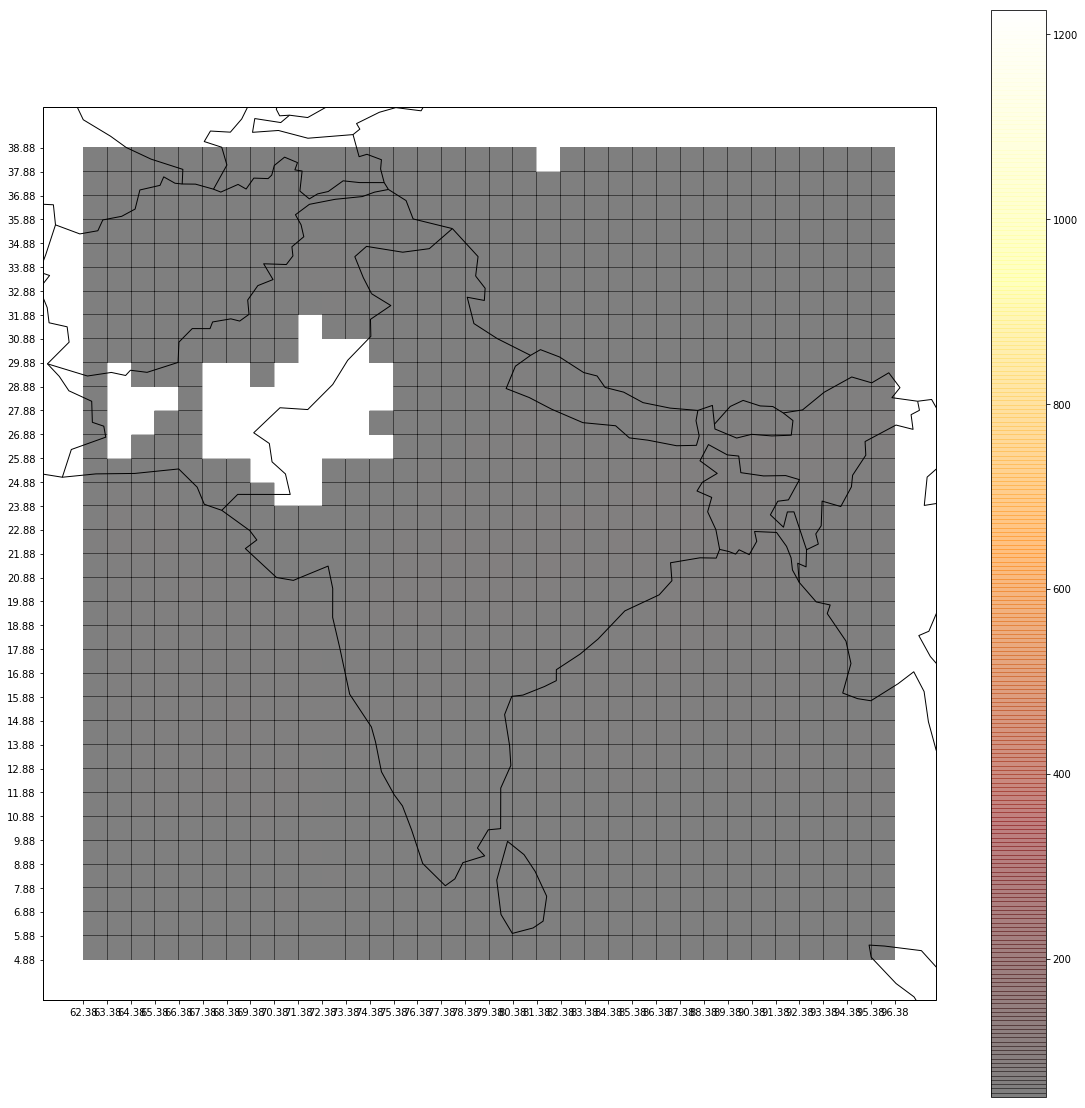

In [84]:
Visualization.create_cartopy_vis(ond_cent_degree, 'OND_centrality_1.0.png')

(<matplotlib.figure.Figure at 0x2d19e7d7e80>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2d18f55c940>)

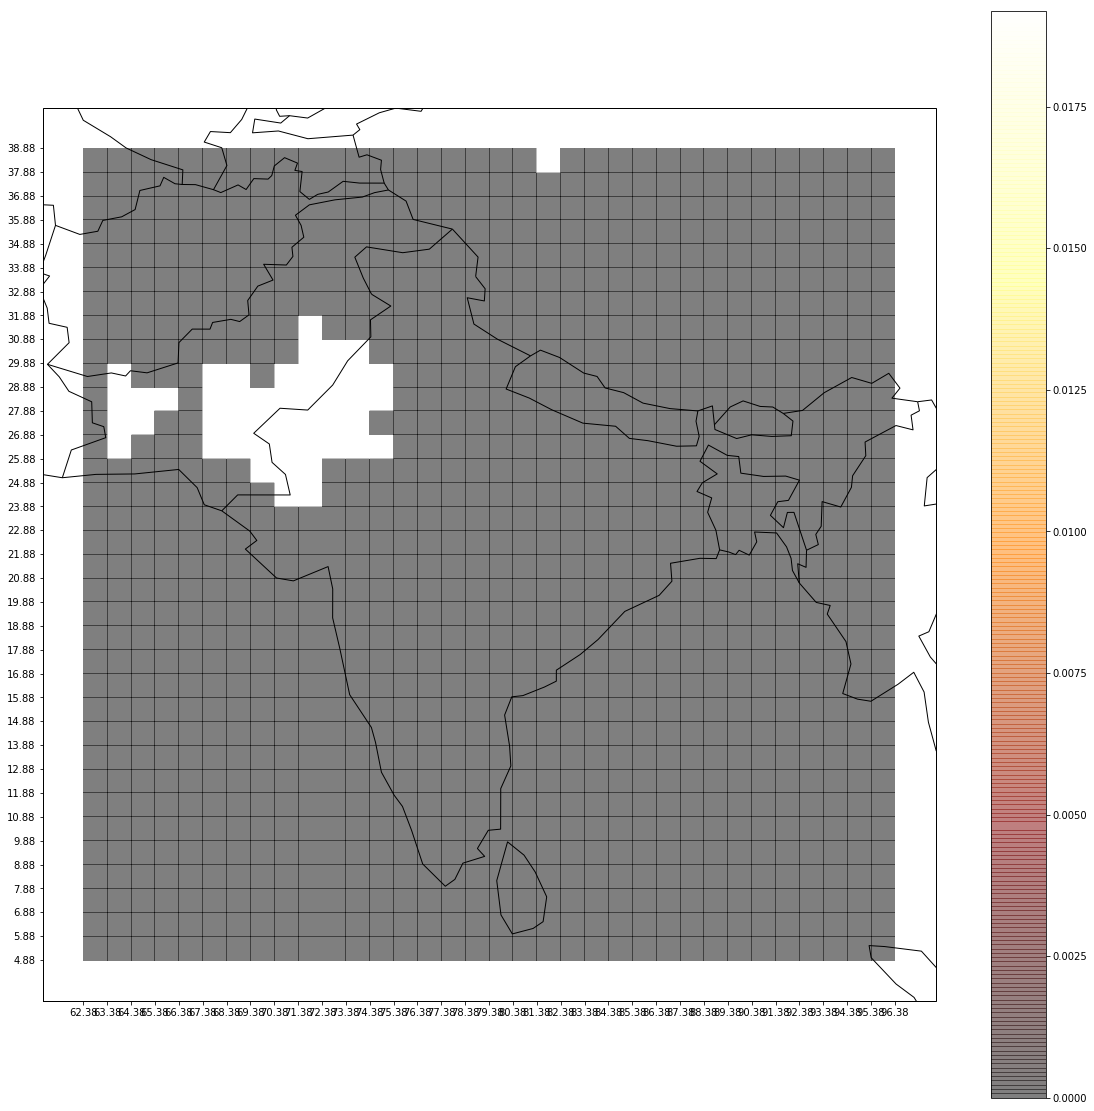

In [85]:
Visualization.create_cartopy_vis(ond_cent_between, 'OND_betweenness_1.0.png')

(<matplotlib.figure.Figure at 0x2d19e8d2278>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2d19e8bfac8>)

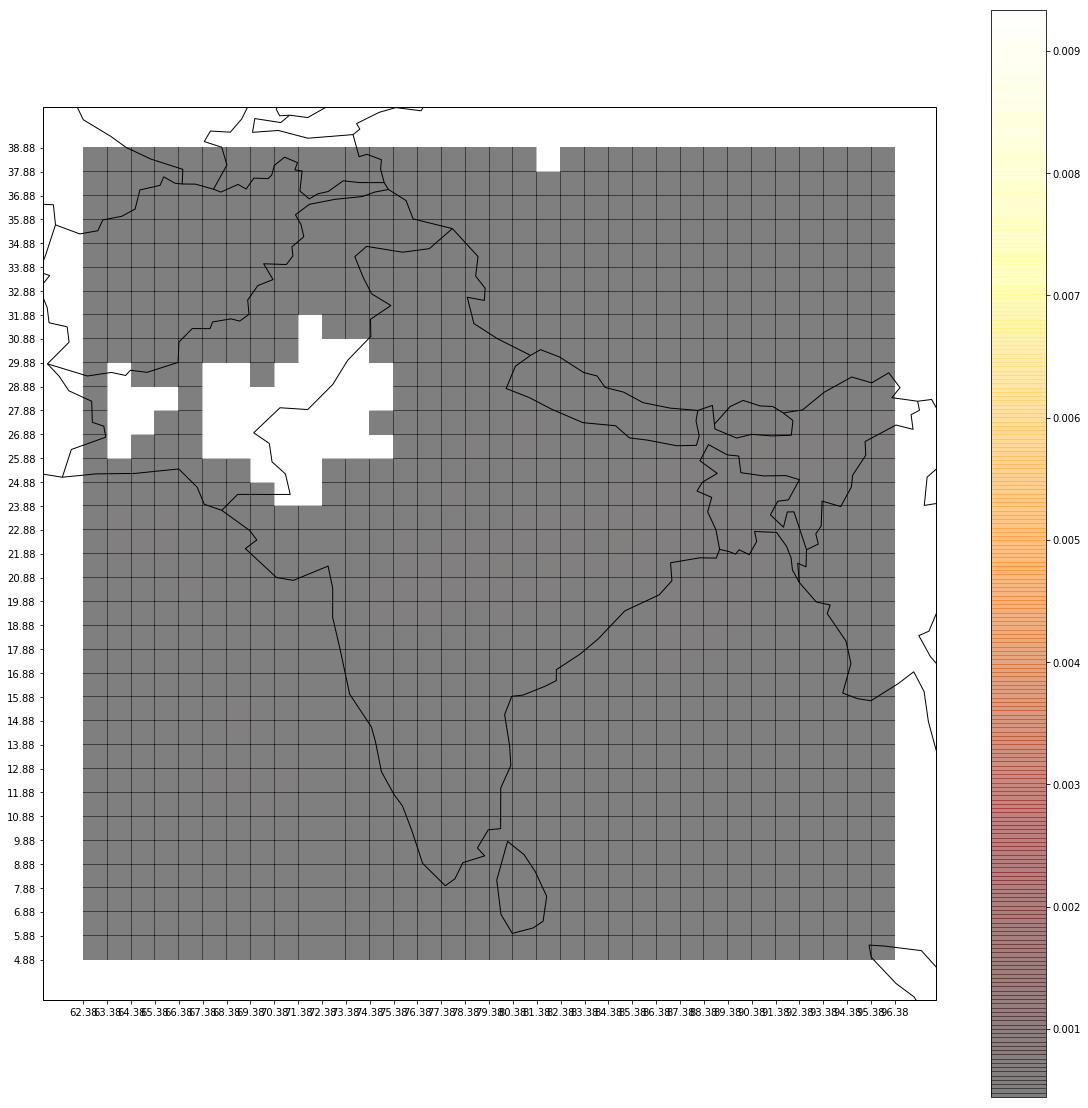

In [86]:
Visualization.create_cartopy_vis(ond_pagerank, 'OND_pagerank_1.0.png')